# What the enneagram says about the traits we value most 

In this analysis, I'll explore the relationship between an individual's enneagram and the likelihood that they agree with their type's description. 

The major assumption here is that people are more likely to accept information they perceive as good and reject information they perceive as bad.  

I'll consider the reasons why different types agree (or disagree) with their enneagram type description what this says about the personality traits we value the most. I'll also discuss opportunities for further analysis.

I used Python (pandas, seaborn, pandasql). For a Jupyter Notebook with my code, [go here](https://github.com/The-Rebeckoning/data-science/blob/main/portfolio/enneagram-analysis.ipynb).

If you'd like to take the test, [here's a free one I like](https://www.eclecticenergies.com/enneagram/test). If you're inspired by my analysis and looking to spend a little bit of money, I'd recommend the test from the [Enneagram Institute](https://tests.enneagraminstitute.com/orders/create). 

Last, for the purposes of this assessment, I'm making assumptions that the enneagram is an accurate assessment of personality. I'll explore the possibility that this is not the case in the last section.

## What is the enneagram?

The enneagram is a personality test that consists of nine basic types.

Every person has a basic type that represents their core personality. There's debate about how people come to develop their type (ie nature versus nurture) but what's important is that, once formed, it doesn't change. 

Here's a picture showing a high level list showing the overview of the nine types from the [Enneagram Institute](https://www.enneagraminstitute.com/type-descriptions):

    1 THE REFORMER
    The Rational, Idealistic Type: Principled, Purposeful, Self-Controlled, and Perfectionistic

    2 THE HELPER
    The Caring, Interpersonal Type: Demonstrative, Generous, People-Pleasing, and Possessive

    3 THE ACHIEVER
    The Success-Oriented, Pragmatic Type: Adaptive, Excelling, Driven, and Image-Conscious

    4 THE INDIVIDUALIST
    The Sensitive, Withdrawn Type: Expressive, Dramatic, Self-Absorbed, and Temperamental

    5 THE INVESTIGATOR
    The Intense, Cerebral Type: Perceptive, Innovative, Secretive, and Isolated

    6 THE LOYALIST
    The Committed, Security-Oriented Type: Engaging, Responsible, Anxious, and Suspicious

    7 THE ENTHUSIAST
    The Busy, Fun-Loving Type: Spontaneous, Versatile, Distractible, and Scattered

    8 THE CHALLENGER
    The Powerful, Dominating Type: Self-Confident, Decisive, Willful, and Confrontational

    9 THE PEACEMAKER
    The Easygoing, Self-Effacing Type: Receptive, Reassuring, Agreeable, and Complacent

 

# Data Cleanup

In [1]:
# Import pandas, pandasql, seaborn and regex

import pandas as pd
from pandasql import sqldf
import seaborn as sns 
import regex as re

# Create a dataframe from the raw data

types = pd.read_csv('dataset.csv')

# Create a new df the columns we need

types_subset = types[["enneagram","wing", "accuracy.enneagram","timestamp"]]

# Create a function to extract the number from the enneagram string

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

# Using the function above, create a new column that has the enneagream in the form of a number for readibliity 

types_subset['typenum']=types_subset['enneagram'].apply(lambda x: find_number(x))

# Relabel the accuracy column for readibility and understanding

types_subset.rename(columns = {'accuracy.enneagram':'perceived_accuracy'}, inplace = True)


/var/folders/m7/pr2047y173x50c8xddxm6ndr0000gn/T/ipykernel_19330/3846083804.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  types_subset['typenum']=types_subset['enneagram'].apply(lambda x: find_number(x))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# Analysis

## Distribution of types

Text(0.5, 0, 'Enneagram type by count')

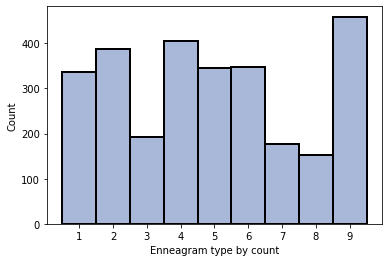

In [4]:
# Create new dataframe to sort the values so they show in order

sorted = types_subset.sort_values(by = 'typenum')


# Create histogram 

count_enneagram_hist = sns.histplot(data=sorted, x="typenum",color=sns.color_palette('Set2')[2], linewidth=2)

# Label and generate the histogram

count_enneagram_hist.set_xlabel("Enneagram type by count")



As we can see, the most common enneagram type in our dataset is a type nine. Twos and fours and the next most common type. Ones, fives and sixes are evenly represented whereas threes, sevens and eights were least common.

Although no comprehensive enneagram estimate exists for the general population, it's most often cited that the nine is the most common enneagram type. 

### Which enneagram types have the highest and lowest accuracy scores? 

When people report their enneagram type, they're also asked how accurate the enneagram is describing their personality.

Which types tend to report that their enneagram is accurate? Which report lower accuracy scores?

Of those that find the enneagram most accurate in describing their personality are eights, threes and fours. 

The respondents least likely to believe their type accurately describes their personality are fives, followed by sixes and then twos. 

In [ ]:
q = "SELECT enneagram AS 'Enneagram', AVG(perceived_accuracy) AS 'Perceived Accuracy' FROM types_subset GROUP BY enneagram ORDER BY AVG(perceived_accuracy) DESC "

sqldf(q, locals())



,Enneagram,Perceived Accuracy
0,Type 8 (the Protector or Challenger),4.197368
1,Type 3 (the Performer or Achiever),4.151042
2,Type 4 (the Individualist or Romantic),4.108374
3,Type 9 (the Peacemaker or Mediator),4.063181
4,Type 1 (the Reformer or Perfectionist),4.002967
5,Type 7 (the Enthusiast or Epicure),3.977273
6,Type 2 (the Helper or Giver),3.927835
7,Type 6 (the Loyalist or Loyal Skeptic),3.913545
8,Type 5 (the Investigator or Observer),3.704348


## Key takeaways

### Takeaway one: We value people who value themselves. 

If we compare the qualities between types with the highest and lowest perceived accuracy scores, we learn that types that exhibit more selfishness perceive their description as accurate. 

Eights are the most dominant and strong-willed of enneagram types. Threes are the "go getters" of the enneagram and four the romantics. These are three very different types but they all show a strong degree of focus on self and desire to get their needs met.

It's possible that these types like their description because they're widely celebrated (which brings us to our next takeaway).

### Takeaway two: Overlooked traits are valued less. 

Now, we can turn to those types that are least likely to perceive their enneagram as accurate: fives, sixes and twos. At first glance, these three types have very little in common. Fives are the thinkers, sixes the "go down with the ship" loyalists and twos the helpers.

In terms of personality, what these types have in common is they represent qualities that are needed in society but are often overlooked. For example, the two "the Helper" takes care of others. This type of emotional labor, though badly-needed, is often unseen. 

When these types read their description, perhaps it's a reminder of the parts of themselves are are unrecognized by society and, in an effort to distance themselves from that self, they perceive it as less accurate. 


### Takeaway three: The delivery of personality assessments should be subjective.

When it comes to personality tests, before communicating the results, it's important to take a step back and consider how the person receiving the personality test will understand that assessment. 

For example, an enneagram who is more likely to perceive the results positively may need to consider how the dark side of their type is also relevant and vice-versa. Feedback and recommendations for self-development should also reflect an individual dark side and sense of self. 

### Conclusion

The enneagram is a useful framework for individuals to better understand themselves and how they relate to others. My analysis shows that certain types agree more with their type descriptions whereas others are less sure. This variance might indicate that society as a whole values traits of those who look out for their own interests. 

Here's some topics for additional exploration:

- Analysis about whether or not the enneagram is a useful measure of personality
- Compare the enneagram to other personality tests in terms of perceived accuracy (for example, Myer's Briggs)
- Consider how mood impacts the likelihood of accepting/rejecting personality assessment